# Análisis de los datos

# Índice

1 - Nos traemos los datos de la BBDD de MongoDB

    - Datos de 2019
    - Datos de 2020
    
2 - Análisis de las señales rssi  


### Notas

1- estructura de este notebook:

    - Análisis de datos de 2019
    - Análisis de datos de 2020
    - Comparativa entre 2019 y 2020
    
2- Para el estudio de las señales rssi, crear mapas tipo mapas de calor, para ello, juntar todos los valores de las señales que contengan el mismo valor y representarlo con un área de incidencia sobre una superficie acotada, para ver su distribución en el espacio.


### Bibliografía

1- https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html

2- https://pythonbros.com/grafica-de-barras-con-matplotlib/

## Datos de 2019

In [2]:
from pymongo import MongoClient
import pandas as pd
 
cliente = MongoClient ('localhost', 27017)
collection = cliente ["Datos_Análisis_2019"] ["Señal_rssi.Datos_Análisis_2019"]
data = collection.find()
data = list (data) # Al convertir a una lista, puede filtrar solo los datos que necesita según la situación. (para filtrado transversal)
Señal_rssi = pd.DataFrame (data) # leer la tabla completa (DataFrame)
Señal_rssi

,_id,señales_rssi
0,62234f2d878173c8f23be106,"[26, 25, 29, 24, 40, 23, 24, 27, 26, 31, 35, 2..."
1,62234f2e878173c8f23be107,"[24, 23, 27, 34, 25, 23, 24, 22, 24, 27, 29, 2..."
2,62234f2f878173c8f23be108,"[28, 37, 28, 25, 24, 23, 22, 28, 25, 22, 29, 3..."
3,62234f2f878173c8f23be109,"[34, 28, 28, 25, 24, 25, 24, 31, 30, 23, 26, 2..."
4,62234f30878173c8f23be10a,"[30, 22, 22, 22, 36, 25, 25, 24, 25, 27, 23, 3..."
5,62234f30878173c8f23be10b,"[23, 23, 29, 38, 37, 24, 23, 24, 40, 30, 24, 2..."
6,62234f31878173c8f23be10c,"[27, 23, 28, 23, 33, 26, 28, 22, 23, 29, 27, 2..."
7,62234f32878173c8f23be10d,"[24, 24, 32, 32, 28, 28, 25, 28, 28, 25, 25, 2..."


## Datos 2020

In [2]:
from pymongo import MongoClient
import pandas as pd
 
cliente = MongoClient ('localhost', 27017)
collection = cliente ["Datos_Análisis_2020"] ["Señal_rssi.Datos_Análisis_2020"]
data = collection.find()
data = list (data) # Al convertir a una lista, puede filtrar solo los datos que necesita según la situación. (para filtrado transversal)
Señal_rssi_2020 = pd.DataFrame (data) # leer la tabla completa (DataFrame)
Señal_rssi_2020

,_id,señales_rssi
0,6226152813c4febc9d0f9830,"[23, 22, 23, 22, 24, 22, 22, 23, 25, 25, 24, 2..."
1,6226152813c4febc9d0f9831,"[8, 15, 18, 8, 18, 18, 10, 16, 10, 15, 8, 5, 6..."
2,6226152913c4febc9d0f9832,"[3, 5, 22, 7, 8, 7, 2, 4, 3, 5, 2, 10, 18, 8, ..."
3,6226152a13c4febc9d0f9833,"[24, 8, 7, 17, 10, 6, 7, 18, 3, 10, 13, 10, 16..."
4,6226152a13c4febc9d0f9834,"[23, 20, 12, 12, 19, 12, 8, 3, 6, 13, 10, 6, 3..."
5,6226152b13c4febc9d0f9835,"[5, 7, 3, 15, 11, 9, 7, 5, 7, 6, 6, 4, 16, 15,..."
6,6226152c13c4febc9d0f9836,"[5, 3, 14, 10, 1, 10, 3, 3, 10, 39, 8, 8, 6, 6..."
7,6226152c13c4febc9d0f9837,"[1, 12, 9, 9, 10, 2, 2, 5, 6, 5, 3, 8, 16, 3, ..."
8,6226152d13c4febc9d0f9838,"[8, 18, 4, 1, 7, 15, 5, 6, 9, 7, 6, 5, 8, 13, ..."
9,6226152e13c4febc9d0f9839,"[3, 10, 8, 2, 9, 3, 8, 5, 26, 7, 4, 5, 9, 15, ..."


## Análisis de las señales rssi de 2019

El primer paso que vamos a realizar va a ser juntar todas las señales rssi de la BBDD en un único array.
Después separaremos las señales por valores iguales. Para ello usaremos la biblioteca collections.

In [2]:
from pymongo import MongoClient
import pandas as pd
 
cliente = MongoClient ('localhost', 27017)
collection = cliente ["Datos_Análisis_2019"] ["Señal_rssi.Datos_Análisis_2019"]
data = collection.find()
data = list (data) # Al convertir a una lista, puede filtrar solo los datos que necesita según la situación. (para filtrado transversal)
Señal_rssi = pd.DataFrame (data) # leer la tabla completa (DataFrame)
Señal_rssi

,_id,señales_rssi
0,62234f2d878173c8f23be106,"[26, 25, 29, 24, 40, 23, 24, 27, 26, 31, 35, 2..."
1,62234f2e878173c8f23be107,"[24, 23, 27, 34, 25, 23, 24, 22, 24, 27, 29, 2..."
2,62234f2f878173c8f23be108,"[28, 37, 28, 25, 24, 23, 22, 28, 25, 22, 29, 3..."
3,62234f2f878173c8f23be109,"[34, 28, 28, 25, 24, 25, 24, 31, 30, 23, 26, 2..."
4,62234f30878173c8f23be10a,"[30, 22, 22, 22, 36, 25, 25, 24, 25, 27, 23, 3..."
5,62234f30878173c8f23be10b,"[23, 23, 29, 38, 37, 24, 23, 24, 40, 30, 24, 2..."
6,62234f31878173c8f23be10c,"[27, 23, 28, 23, 33, 26, 28, 22, 23, 29, 27, 2..."
7,62234f32878173c8f23be10d,"[24, 24, 32, 32, 28, 28, 25, 28, 28, 25, 25, 2..."


In [48]:
#extraemos cada uno de los objetos de la BBDD
Señal_rssi_2019_1 = Señal_rssi.iloc[0]
Señal_rssi_2019_2 = Señal_rssi.iloc[1]
Señal_rssi_2019_3 = Señal_rssi.iloc[2]
Señal_rssi_2019_4 = Señal_rssi.iloc[3]
Señal_rssi_2019_5 = Señal_rssi.iloc[4]
Señal_rssi_2019_6 = Señal_rssi.iloc[5]
Señal_rssi_2019_7 = Señal_rssi.iloc[6]
Señal_rssi_2019_8 = Señal_rssi.iloc[7]

#de cada uno de los objetos con quedamos con los datos, suprimiendo el id y el type
Señal_rssi_2019_1[1]
Señal_rssi_2019_2[1]
Señal_rssi_2019_3[1]
Señal_rssi_2019_4[1]
Señal_rssi_2019_5[1]
Señal_rssi_2019_6[1]
Señal_rssi_2019_7[1]
Señal_rssi_2019_8[1]

#creamos arrays independientes con los datos.
Señal_rssi_1 = Señal_rssi_2019_1[1]
Señal_rssi_2 = Señal_rssi_2019_2[1]
Señal_rssi_3 = Señal_rssi_2019_3[1]
Señal_rssi_4 = Señal_rssi_2019_4[1]
Señal_rssi_5 = Señal_rssi_2019_5[1]
Señal_rssi_6 = Señal_rssi_2019_6[1]
Señal_rssi_7 = Señal_rssi_2019_7[1]
Señal_rssi_8 = Señal_rssi_2019_8[1]

#print(Señal_rssi_1, Señal_rssi_2, Señal_rssi_3, Señal_rssi_4, Señal_rssi_5, Señal_rssi_6, Señal_rssi_7, Señal_rssi_8)
print(Señal_rssi_1)

[26, 25, 29, 24, 40, 23, 24, 27, 26, 31, 35, 26, 29, 29, 33, 36, 25, 25, 34, 29, 29, 27, 59, 30, 31, 30, 40, 27, 35, 63, 31, 35, 39, 28, 33, 35, 27, 31, 35, 41, 28, 26, 61, 32, 24, 31, 36, 27, 33, 29, 25, 28, 23, 27, 23, 24, 33, 33, 34, 25, 37, 40, 35, 30, 60, 28, 28, 38, 31, 28, 29, 24, 24, 27, 38, 34, 26, 39, 40, 23, 36, 32, 27, 37, 39, 27, 26, 40, 24, 33, 30, 33, 44, 37, 32, 28, 36, 39, 28, 28, 35, 32, 36, 33, 29, 26, 34, 28, 23, 24, 31, 22, 35, 32, 24, 33, 34, 24, 26, 33, 38, 61, 43, 30, 66, 29, 32, 24, 37, 27, 29, 33, 29, 42, 30, 33, 28, 34, 23, 23, 31, 25, 39, 26, 31, 35, 38, 25, 23, 30, 31, 33, 40, 32, 30, 22, 26, 28, 31, 27, 23, 22, 44, 41, 28, 32, 28, 36, 25, 35, 33, 28, 29, 40, 27, 38, 27, 39, 27, 24, 25, 27, 28, 35, 26, 34, 22, 25, 39, 34, 28, 29, 29, 37, 37, 30, 30, 42, 42, 24, 24, 29, 31, 38, 33, 42, 24, 29, 30, 32, 34, 38, 37, 28, 23, 30, 33, 31, 35, 27, 22, 41, 24, 22, 33, 38, 24, 29, 22, 35, 38, 37, 35, 32, 34, 30, 35, 30, 24, 31, 38, 35, 25, 25, 37, 27, 24, 42, 33, 23,

In [49]:
len(Señal_rssi_1)

560747

In [56]:
señales_rssi_2019 = (Señal_rssi_1 + Señal_rssi_2 + Señal_rssi_3 + Señal_rssi_4 + Señal_rssi_5 + Señal_rssi_6 + 
                     Señal_rssi_7 + Señal_rssi_8)
    
len(señales_rssi_2019)

4485975

En el siguiente script de python sacamos los elementos que se repiten y el número de veces que se repiten

In [55]:
import collections
Resumen_Señal_rssi_2019 = collections.Counter(señales_rssi_2019)
Resumen_Señal_rssi_2019

Counter({26: 415342,
         25: 518140,
         29: 193763,
         24: 590121,
         40: 11220,
         23: 739753,
         27: 316323,
         31: 114652,
         35: 51581,
         33: 73463,
         36: 36262,
         34: 69103,
         59: 78,
         30: 139455,
         63: 46,
         39: 14413,
         28: 259757,
         41: 7913,
         61: 71,
         32: 79300,
         37: 28272,
         60: 78,
         38: 20099,
         44: 3648,
         22: 780163,
         43: 4734,
         66: 24,
         42: 5880,
         64: 37,
         50: 754,
         54: 337,
         46: 2129,
         47: 1548,
         62: 45,
         55: 300,
         56: 244,
         53: 407,
         45: 2550,
         65: 25,
         58: 164,
         49: 959,
         73: 4,
         52: 487,
         51: 591,
         48: 1190,
         57: 189,
         69: 7,
         68: 14,
         70: 3,
         87: 175,
         71: 4,
         77: 2,
         72: 3,
         82

Proceso automatizado:

In [123]:
from pymongo import MongoClient
import pandas as pd
import collections

 
cliente = MongoClient ('localhost', 27017)
collection = cliente ["Datos_Análisis_2019"] ["Señal_rssi.Datos_Análisis_2019"]
data = collection.find()
data = list (data) # Al convertir a una lista, puede filtrar solo los datos que necesita según la situación. (para filtrado transversal)
Señal_rssi = pd.DataFrame (data) # leer la tabla completa (DataFrame)


#extraemos cada uno de los objetos de la BBDD
Señal_rssi_2019_1 = Señal_rssi.iloc[0]
Señal_rssi_2019_2 = Señal_rssi.iloc[1]
Señal_rssi_2019_3 = Señal_rssi.iloc[2]
Señal_rssi_2019_4 = Señal_rssi.iloc[3]
Señal_rssi_2019_5 = Señal_rssi.iloc[4]
Señal_rssi_2019_6 = Señal_rssi.iloc[5]
Señal_rssi_2019_7 = Señal_rssi.iloc[6]
Señal_rssi_2019_8 = Señal_rssi.iloc[7]

#de cada uno de los objetos con quedamos con los datos, suprimiendo el id y el type
Señal_rssi_2019_1[1]
Señal_rssi_2019_2[1]
Señal_rssi_2019_3[1]
Señal_rssi_2019_4[1]
Señal_rssi_2019_5[1]
Señal_rssi_2019_6[1]
Señal_rssi_2019_7[1]
Señal_rssi_2019_8[1]

#creamos arrays independientes con los datos.
Señal_rssi_1 = Señal_rssi_2019_1[1]
Señal_rssi_2 = Señal_rssi_2019_2[1]
Señal_rssi_3 = Señal_rssi_2019_3[1]
Señal_rssi_4 = Señal_rssi_2019_4[1]
Señal_rssi_5 = Señal_rssi_2019_5[1]
Señal_rssi_6 = Señal_rssi_2019_6[1]
Señal_rssi_7 = Señal_rssi_2019_7[1]
Señal_rssi_8 = Señal_rssi_2019_8[1]

señales_rssi_2019 = (Señal_rssi_1 + Señal_rssi_2 + Señal_rssi_3 + Señal_rssi_4 + Señal_rssi_5 + Señal_rssi_6 + 
                     Señal_rssi_7 + Señal_rssi_8)
    
Resumen_Señal_rssi_2019 = collections.Counter(señales_rssi_2019)
Resumen_Señal_rssi_2019

Counter({26: 415342,
         25: 518140,
         29: 193763,
         24: 590121,
         40: 11220,
         23: 739753,
         27: 316323,
         31: 114652,
         35: 51581,
         33: 73463,
         36: 36262,
         34: 69103,
         59: 78,
         30: 139455,
         63: 46,
         39: 14413,
         28: 259757,
         41: 7913,
         61: 71,
         32: 79300,
         37: 28272,
         60: 78,
         38: 20099,
         44: 3648,
         22: 780163,
         43: 4734,
         66: 24,
         42: 5880,
         64: 37,
         50: 754,
         54: 337,
         46: 2129,
         47: 1548,
         62: 45,
         55: 300,
         56: 244,
         53: 407,
         45: 2550,
         65: 25,
         58: 164,
         49: 959,
         73: 4,
         52: 487,
         51: 591,
         48: 1190,
         57: 189,
         69: 7,
         68: 14,
         70: 3,
         87: 175,
         71: 4,
         77: 2,
         72: 3,
         82

In [124]:
print(type(Resumen_Señal_rssi_2019))

<class 'collections.Counter'>


Para poder manejar los datos más cómodamente, convertimos el <class 'collections.Counter'> en un diccionario de python, para separar la intensidad de la señal del número de veces que se repite.

In [125]:
Dict_Señal_rssi_2019=dict(Resumen_Señal_rssi_2019) 
print("Dictionary is ",Dict_Señal_rssi_2019)

Dictionary is  {26: 415342, 25: 518140, 29: 193763, 24: 590121, 40: 11220, 23: 739753, 27: 316323, 31: 114652, 35: 51581, 33: 73463, 36: 36262, 34: 69103, 59: 78, 30: 139455, 63: 46, 39: 14413, 28: 259757, 41: 7913, 61: 71, 32: 79300, 37: 28272, 60: 78, 38: 20099, 44: 3648, 22: 780163, 43: 4734, 66: 24, 42: 5880, 64: 37, 50: 754, 54: 337, 46: 2129, 47: 1548, 62: 45, 55: 300, 56: 244, 53: 407, 45: 2550, 65: 25, 58: 164, 49: 959, 73: 4, 52: 487, 51: 591, 48: 1190, 57: 189, 69: 7, 68: 14, 70: 3, 87: 175, 71: 4, 77: 2, 72: 3, 82: 5, 80: 4, 81: 3, 79: 3, 75: 3, 76: 3, 67: 5, 83: 5, 89: 21, 88: 90, 90: 5, 86: 3, 78: 3}


In [126]:
valores_señal_2019 = list(Dict_Señal_rssi_2019.values())
print(valores_señal_2019)

[415342, 518140, 193763, 590121, 11220, 739753, 316323, 114652, 51581, 73463, 36262, 69103, 78, 139455, 46, 14413, 259757, 7913, 71, 79300, 28272, 78, 20099, 3648, 780163, 4734, 24, 5880, 37, 754, 337, 2129, 1548, 45, 300, 244, 407, 2550, 25, 164, 959, 4, 487, 591, 1190, 189, 7, 14, 3, 175, 4, 2, 3, 5, 4, 3, 3, 3, 3, 5, 5, 21, 90, 5, 3, 3]


In [127]:
Intensidad_señal_2019 = [*Dict_Señal_rssi_2019]
print(Intensidad_señal_2019)

[26, 25, 29, 24, 40, 23, 27, 31, 35, 33, 36, 34, 59, 30, 63, 39, 28, 41, 61, 32, 37, 60, 38, 44, 22, 43, 66, 42, 64, 50, 54, 46, 47, 62, 55, 56, 53, 45, 65, 58, 49, 73, 52, 51, 48, 57, 69, 68, 70, 87, 71, 77, 72, 82, 80, 81, 79, 75, 76, 67, 83, 89, 88, 90, 86, 78]


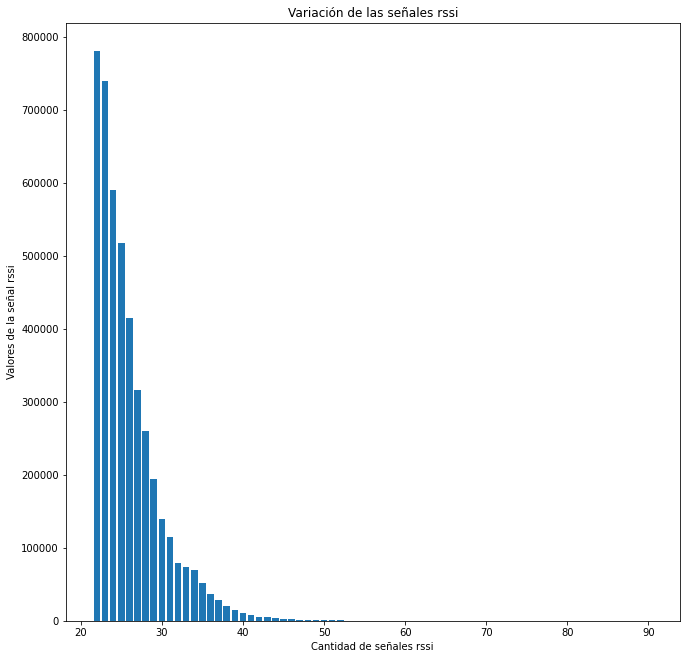

In [137]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,11))

## Declaramos valores para el eje x
eje_x = Intensidad_señal_2019
 
## Declaramos valores para el eje y
eje_y = valores_señal_2019
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Leyenda en el eje y
plt.ylabel('Valores de la señal rssi')
 
## Legenda en el eje x
plt.xlabel('Cantidad de señales rssi')
 
## Título de Gráfica
plt.title('Variación de las señales rssi')
 
## Mostramos Gráfica
plt.show()

## Análisis de las señales rssi de 2020

In [116]:
from pymongo import MongoClient
import pandas as pd
 
cliente = MongoClient ('localhost', 27017)
collection = cliente ["Datos_Análisis_2020"] ["Señal_rssi.Datos_Análisis_2020"]
data = collection.find()
data = list (data) # Al convertir a una lista, puede filtrar solo los datos que necesita según la situación. (para filtrado transversal)
Señal_rssi_2020 = pd.DataFrame (data) # leer la tabla completa (DataFrame)
#Señal_rssi_2020
#extraemos cada uno de los objetos de la BBDD
Señal_rssi_2020_1 = Señal_rssi_2020.iloc[0]
Señal_rssi_2020_2 = Señal_rssi_2020.iloc[1]
Señal_rssi_2020_3 = Señal_rssi_2020.iloc[2]
Señal_rssi_2020_4 = Señal_rssi_2020.iloc[3]
Señal_rssi_2020_5 = Señal_rssi_2020.iloc[4]
Señal_rssi_2020_6 = Señal_rssi_2020.iloc[5]
Señal_rssi_2020_7 = Señal_rssi_2020.iloc[6]
Señal_rssi_2020_8 = Señal_rssi_2020.iloc[7]
Señal_rssi_2020_9 = Señal_rssi_2020.iloc[8]
Señal_rssi_2020_10 = Señal_rssi_2020.iloc[9]
Señal_rssi_2020_11 = Señal_rssi_2020.iloc[10]

#de cada uno de los objetos con quedamos con los datos, suprimiendo el id y el type
Señal_rssi_2020_1[1]
Señal_rssi_2020_2[1]
Señal_rssi_2020_3[1]
Señal_rssi_2020_4[1]
Señal_rssi_2020_5[1]
Señal_rssi_2020_6[1]
Señal_rssi_2020_7[1]
Señal_rssi_2020_8[1]
Señal_rssi_2020_9[1]
Señal_rssi_2020_10[1]
Señal_rssi_2020_11[1]

#creamos arrays independientes con los datos.
Señal_rssi_1 = Señal_rssi_2020_1[1]
Señal_rssi_2 = Señal_rssi_2020_2[1]
Señal_rssi_3 = Señal_rssi_2020_3[1]
Señal_rssi_4 = Señal_rssi_2020_4[1]
Señal_rssi_5 = Señal_rssi_2020_5[1]
Señal_rssi_6 = Señal_rssi_2020_6[1]
Señal_rssi_7 = Señal_rssi_2020_7[1]
Señal_rssi_8 = Señal_rssi_2020_8[1]
Señal_rssi_9 = Señal_rssi_2020_9[1]
Señal_rssi_10 = Señal_rssi_2020_10[1]
Señal_rssi_11 = Señal_rssi_2020_11[1]

señales_rssi_2020 = (Señal_rssi_1 + Señal_rssi_2 + Señal_rssi_3 + Señal_rssi_4 + Señal_rssi_5 + Señal_rssi_6 + 
                     Señal_rssi_7 + Señal_rssi_8 + Señal_rssi_9+ Señal_rssi_10 + Señal_rssi_11)
    
Resumen_Señal_rssi_2020 = collections.Counter(señales_rssi_2020)
Resumen_Señal_rssi_2020

Counter({23: 50910,
         22: 61437,
         24: 40272,
         25: 34105,
         27: 21708,
         28: 17079,
         29: 13397,
         31: 7999,
         26: 27500,
         30: 10110,
         33: 4922,
         36: 2317,
         32: 5997,
         37: 1864,
         34: 4133,
         35: 3146,
         38: 1471,
         87: 1,
         88: 1,
         43: 471,
         44: 391,
         83: 6,
         39: 1170,
         41: 749,
         40: 1019,
         49: 132,
         45: 331,
         47: 215,
         42: 557,
         54: 26,
         46: 258,
         82: 6,
         89: 2,
         59: 9,
         53: 54,
         56: 22,
         50: 87,
         52: 54,
         48: 175,
         51: 74,
         57: 10,
         55: 24,
         61: 7,
         58: 11,
         76: 520,
         67: 235,
         74: 380,
         70: 417,
         79: 512,
         78: 858,
         68: 467,
         69: 403,
         71: 571,
         77: 845,
         72: 351,
     

In [117]:
Dict_Señal_rssi_2020 = dict(Resumen_Señal_rssi_2020) 
print("Dictionary is ",Dict_Señal_rssi_2020)

Dictionary is  {23: 50910, 22: 61437, 24: 40272, 25: 34105, 27: 21708, 28: 17079, 29: 13397, 31: 7999, 26: 27500, 30: 10110, 33: 4922, 36: 2317, 32: 5997, 37: 1864, 34: 4133, 35: 3146, 38: 1471, 87: 1, 88: 1, 43: 471, 44: 391, 83: 6, 39: 1170, 41: 749, 40: 1019, 49: 132, 45: 331, 47: 215, 42: 557, 54: 26, 46: 258, 82: 6, 89: 2, 59: 9, 53: 54, 56: 22, 50: 87, 52: 54, 48: 175, 51: 74, 57: 10, 55: 24, 61: 7, 58: 11, 76: 520, 67: 235, 74: 380, 70: 417, 79: 512, 78: 858, 68: 467, 69: 403, 71: 571, 77: 845, 72: 351, 75: 259, 73: 385, 66: 112, 65: 48, 80: 199, 64: 15, 81: 29, 60: 14, 15: 128849, 16: 107500, 10: 281327, 9: 332164, 13: 171361, 8: 391277, 18: 75396, 17: 90259, 6: 528273, 12: 198679, 11: 236950, 7: 457734, 5: 583470, 14: 150214, 19: 61586, 4: 599088, 20: 52309, 3: 552665, 21: 42392, 1: 184818, 2: 403681, 62: 4, 63: 5}


In [120]:
valores_señal_2020 = list(Dict_Señal_rssi_2020.values())
print(valores_señal_2020)

[50910, 61437, 40272, 34105, 21708, 17079, 13397, 7999, 27500, 10110, 4922, 2317, 5997, 1864, 4133, 3146, 1471, 1, 1, 471, 391, 6, 1170, 749, 1019, 132, 331, 215, 557, 26, 258, 6, 2, 9, 54, 22, 87, 54, 175, 74, 10, 24, 7, 11, 520, 235, 380, 417, 512, 858, 467, 403, 571, 845, 351, 259, 385, 112, 48, 199, 15, 29, 14, 128849, 107500, 281327, 332164, 171361, 391277, 75396, 90259, 528273, 198679, 236950, 457734, 583470, 150214, 61586, 599088, 52309, 552665, 42392, 184818, 403681, 4, 5]


In [121]:
Intensidad_señal_2020 = [*Dict_Señal_rssi_2020]
print(Intensidad_señal_2020)

[23, 22, 24, 25, 27, 28, 29, 31, 26, 30, 33, 36, 32, 37, 34, 35, 38, 87, 88, 43, 44, 83, 39, 41, 40, 49, 45, 47, 42, 54, 46, 82, 89, 59, 53, 56, 50, 52, 48, 51, 57, 55, 61, 58, 76, 67, 74, 70, 79, 78, 68, 69, 71, 77, 72, 75, 73, 66, 65, 80, 64, 81, 60, 15, 16, 10, 9, 13, 8, 18, 17, 6, 12, 11, 7, 5, 14, 19, 4, 20, 3, 21, 1, 2, 62, 63]


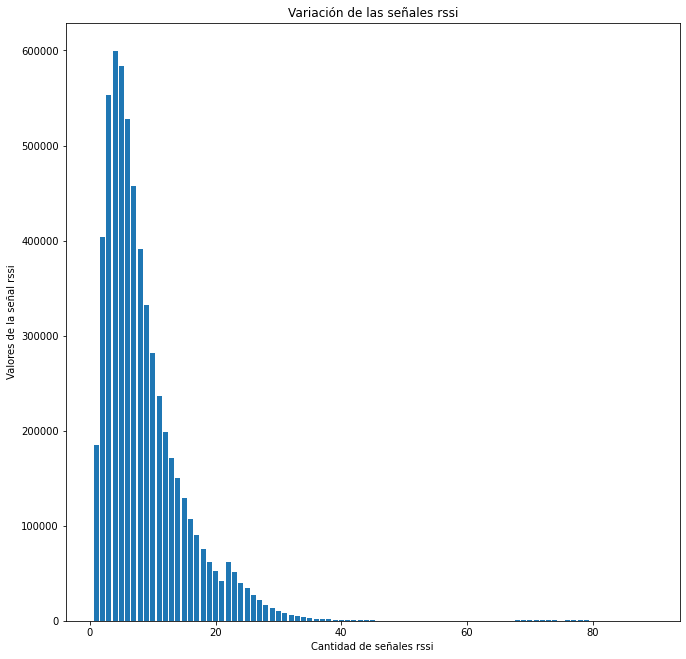

In [141]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

plt.figure(figsize=(11,11))

## Declaramos valores para el eje x
eje_x = Intensidad_señal_2020
 
## Declaramos valores para el eje y
eje_y = valores_señal_2020
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Leyenda en el eje y
plt.ylabel('Valores de la señal rssi')
 
## Legenda en el eje x
plt.xlabel('Cantidad de señales rssi')
 
## Título de Gráfica
plt.title('Variación de las señales rssi')
 
## Mostramos Gráfica
plt.show()

## Comparación señales rssi 2019/2020